# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:

# Read dataset to pandas dataframe
dataset = pd.read_csv("https://raw.githubusercontent.com/starkcr7/data/main/health_dataset.csv")

## Data Analysis EDA

In [3]:
dataset.shape

(1000, 6)

In [4]:
dataset.head()

,Blood_Pressure,Cholesterol,BMI,Glucose,Age,Class
0,156.8,229.7,34.7,148.2,52,Risky
1,158.6,264.1,34.1,169.6,69,Risky
2,135.5,266.3,31.9,159.8,68,Risky
3,143.1,265.3,31.3,171.2,66,Risky
4,103.8,182.7,21.3,96.2,37,Healthy


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Blood_Pressure  1000 non-null   float64
 1   Cholesterol     1000 non-null   float64
 2   BMI             1000 non-null   float64
 3   Glucose         1000 non-null   float64
 4   Age             1000 non-null   int64  
 5   Class           1000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [6]:
dataset.describe()

,Blood_Pressure,Cholesterol,BMI,Glucose,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,132.233900,219.355300,27.540000,123.946600,48.914000
std,20.098221,44.079669,5.328226,36.006252,15.747781
min,82.600000,126.100000,14.300000,59.800000,18.000000
25%,114.900000,180.575000,23.200000,89.700000,39.000000
50%,131.700000,216.550000,27.550000,109.500000,49.000000
75%,149.700000,258.750000,31.900000,159.100000,59.000000
max,179.900000,338.500000,41.700000,191.500000,79.000000


In [7]:
dataset.groupby('Class').size()

Class
Healthy    511
Risky      489
dtype: int64

## Data Preprocessing

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state = 0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 1.22380503  1.44819418  0.49482471  0.79808202  1.47853572]
 [-0.70897801 -1.10592991 -0.46041469 -1.20006673  0.53046701]
 [ 0.09718279  1.2376148   0.92561895  1.1255564   0.02483037]
 ...
 [ 0.62293983  0.75758439  1.43133392  0.99234648  0.53046701]
 [-0.99438897 -0.8251574   0.08276066 -1.31940061 -0.67042001]
 [ 0.34754329  1.49121577  0.25133232  1.03119937 -0.03837421]]


In [12]:
print(X_test)

[[ 0.39761539  1.43687271  0.5135549   1.4197283   0.65687617]
 [ 0.26742793  0.85042046  1.56244521  1.12278119 -0.54401085]
 [-0.5036824  -0.87270758 -1.45311445 -0.98637582 -0.67042001]
 ...
 [-0.16319212 -0.44475594 -1.07851077 -0.85316591 -1.11285207]
 [ 1.42409342  1.1968575   1.18784153  1.24211507 -0.29119253]
 [ 0.43767307  0.8753277   0.04530029  1.02842417  1.60494488]]


## Training the K-NN model on the Training set

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,p=2,metric='manhattan')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

## Getting nearest neighbours for each point in training data

In [14]:
classifier.kneighbors(X=X_train, n_neighbors=7, return_distance=False)

array([[  0, 137, 576, ..., 138, 625, 364],
       [  1, 301, 359, ..., 619, 419, 527],
       [  2, 609, 620, ..., 633,  13,  68],
       ...,
       [697, 332, 178, ..., 538, 295, 399],
       [698, 675, 157, ..., 283, 568, 459],
       [699, 638, 684, ..., 696, 421,  68]])

In [15]:
dataset.iloc[[  0,  16,  73,  55,  54,  60,  29],-1]

0       Risky
16    Healthy
73      Risky
55    Healthy
54    Healthy
60    Healthy
29      Risky
Name: Class, dtype: object

In [16]:
classifier.predict(X_train[[1]])

array(['Healthy'], dtype=object)

## Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Healthy' 'Healthy']
 ['Risky' 'Risky']
 ['Healthy' 'Healthy']
 ['Risky' 'Ris

## Evaluating the Algorithm
## Making the Confusion Matrix & Predicting Accuracy Score

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[168   0]
 [  0 132]]
Accuracy of our model is equal 100.0 %.


## Making Classification Report

In [19]:
from sklearn.metrics import classification_report
# here f1 score is goodness of fit .
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       168
       Risky       1.00      1.00      1.00       132

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Comparing Error Rate with the K Value
## Parameter Tuning Using 
##cross-validation for parameter tuning:

In [20]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,50))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


## plot the error values against K values

<Figure size 640x480 with 0 Axes>

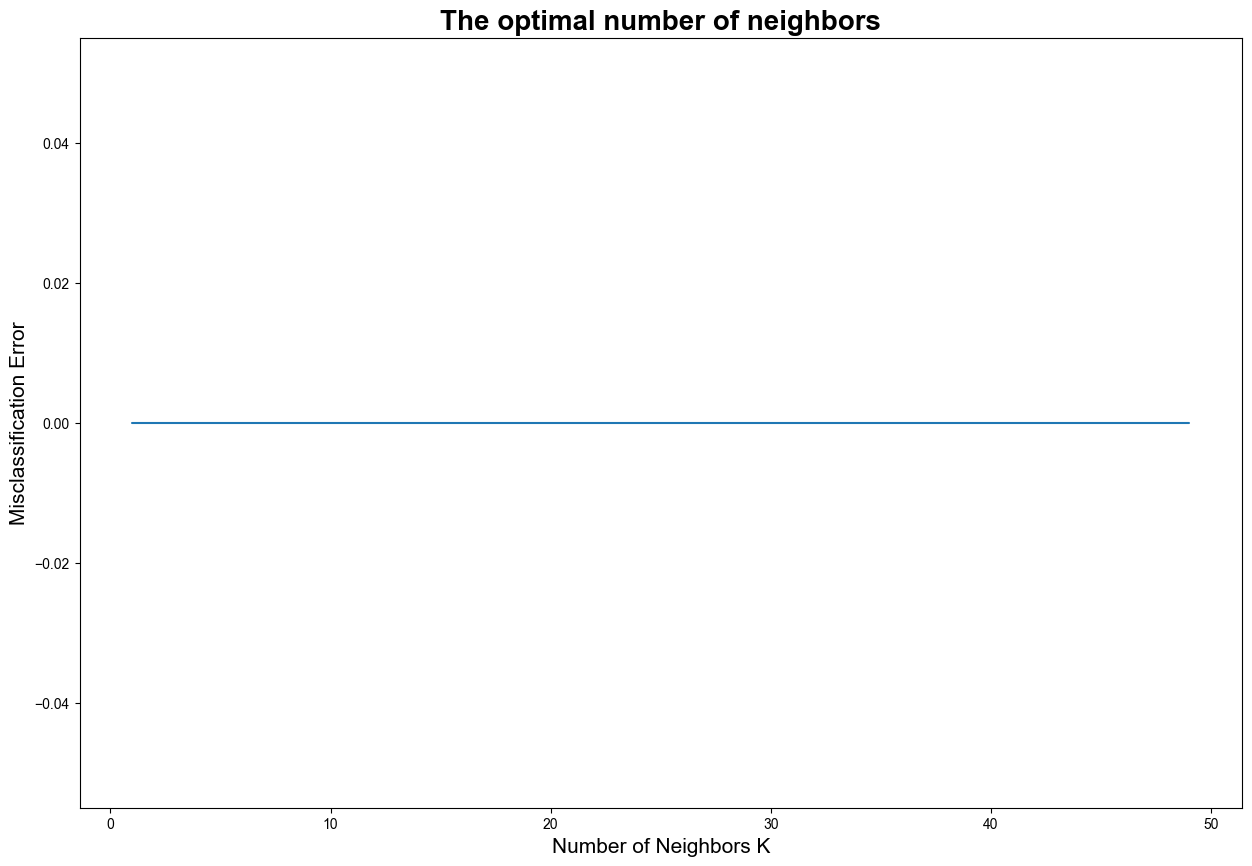

In [21]:
import seaborn as sns

# changing to misclassification error
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

## finding best k

In [22]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


## Visualize Test Result of KNN

C:\Users\Pavan\AppData\Local\Temp\ipykernel_8484\3260090243.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],c=cmap(idx), marker=markers[idx], label=cl)


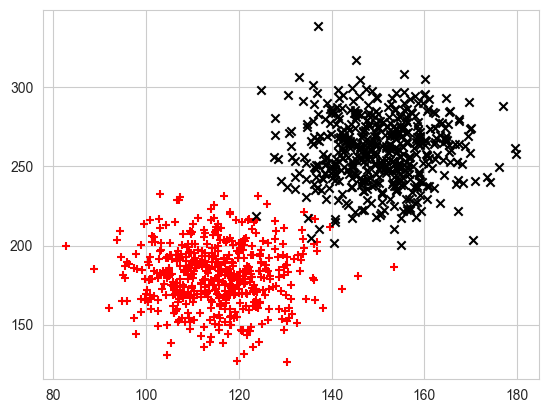

In [23]:
from matplotlib.colors import ListedColormap

markers = ('+', 'x')
colors = ('red', 'black')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],c=cmap(idx), marker=markers[idx], label=cl)